<a href="https://colab.research.google.com/github/Saurav-Bhattacharjee/Telecom-Churn-Analysis/blob/main/Copy_of_Telecom_Churn_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Orange S.A., formerly France Télécom S.A., is a French multinational telecommunications corporation. The Orange Telecom's Churn Dataset, consists of cleaned customer activity data (features), along with a churn label specifying whether a customer canceled the subscription.

## <b> Explore and analyze the data to discover key factors responsible for customer churn and come up with ways/recommendations to ensure customer retention. </b>

In [ ]:
##importing libraries
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
##Reading the dataset
Churn=pd.read_csv('/content/drive/MyDrive/Alma Better/Modules/Python for Data Science/Projects/Telecom Churn.csv') 

In [ ]:
##Check the number of columns in dataset
Churn.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

** Listing of Columns**  
 It can be seen from above that in dataset we have 20 columns/features,among which the 'Churn' feature is our target dependent variable and remaining are our independent variable.   

In [ ]:
Churn.shape

(3333, 20)

In [ ]:
Churn.size

66660

***Shape and Size of the dataset***
   Results from above two lines of code indicate that we have Rows=3333 ,Columns=20,No of entries= 3333*20=66660(Which matches with the output size of the dataset).

In [ ]:
Churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

***Brief information of the features***
As we can see above that features that there are 8Nos of  Float64 features , 8Nos of  int64 features ,3nos of object features and 1 boolean
feature.
Also it can be noted that the main variable of our concern i.e 'Churn' feature column is a Boolean datatype.
Also all 3333 non-null data values agianst every column  indicate that all entries are filled.   

In [ ]:
##Visualsing Top 5 Rows of DataSet
Churn.head().transpose()

,0,1,2,3,4
State,KS,OH,NJ,OH,OK
Account length,128,107,137,84,75
Area code,415,415,415,408,415
International plan,No,No,No,Yes,Yes
Voice mail plan,Yes,Yes,No,No,No
Number vmail messages,25,26,0,0,0
Total day minutes,265.1,161.6,243.4,299.4,166.7
Total day calls,110,123,114,71,113
Total day charge,45.07,27.47,41.38,50.9,28.34
Total eve minutes,197.4,195.5,121.2,61.9,148.3


In [ ]:
##Visualsing bottom 5 Rows of DataSet
Churn.tail().transpose()

,3328,3329,3330,3331,3332
State,AZ,WV,RI,CT,TN
Account length,192,68,28,184,74
Area code,415,415,510,510,415
International plan,No,No,No,Yes,No
Voice mail plan,Yes,No,No,No,Yes
Number vmail messages,36,0,0,0,25
Total day minutes,156.2,231.1,180.8,213.8,234.4
Total day calls,77,57,109,105,113
Total day charge,26.55,39.29,30.74,36.35,39.85
Total eve minutes,215.5,153.4,288.8,159.6,265.9


From Above 2 lines of code we have seen the first glimpse of dataset i.e top & bottom 5 lines of the dataset.
    Now to get the insight of the dataset ,"describe" function will be used with include= "all" option so that all columns will analysed.    

In [ ]:
## To get more insight of the data 
Churn.describe(include='all')

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
count,3333,3333.000000,3333.000000,3333,3333,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333
unique,51,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,WV,NaN,NaN,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
freq,106,NaN,NaN,3010,2411,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2850
mean,NaN,101.064806,437.182418,NaN,NaN,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,NaN
std,NaN,39.822106,42.371290,NaN,NaN,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,NaN
min,NaN,1.000000,408.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,74.000000,408.000000,NaN,NaN,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,NaN
50%,NaN,101.000000,415.000000,NaN,NaN,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,NaN
75%,NaN,127.000000,510.000000,NaN,NaN,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,NaN


In [ ]:
##To find whether any NAN values are present
is_NaN = Churn.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = Churn[row_has_NaN]
rows_with_NaN

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn


In [ ]:
## To find any null value present
Churn.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [ ]:
Churn['Area code']

0       415
1       415
2       415
3       408
4       415
       ... 
3328    415
3329    415
3330    510
3331    510
3332    415
Name: Area code, Length: 3333, dtype: int64

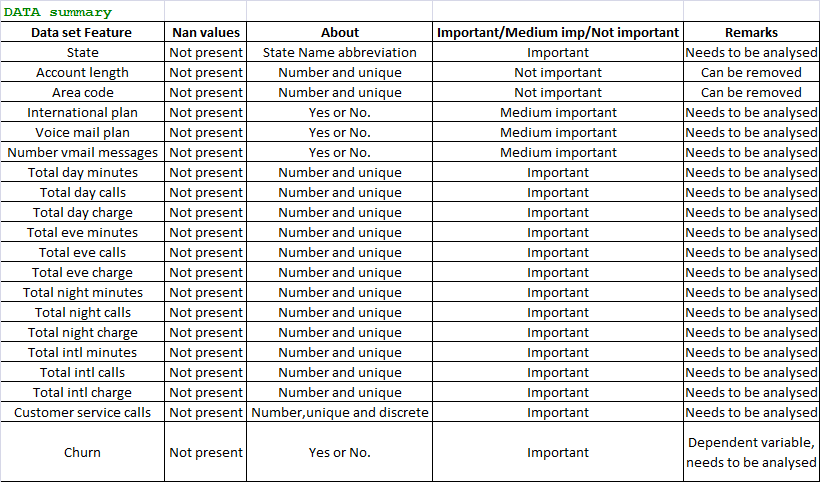

In [ ]:
# duplicate data set
len(Churn[Churn.duplicated()])

0

Above indicates absence of duplicate data sets which gives result as zero which means that no duplicate data is present

In [ ]:
#Gives all the columns in the dataset
Churn.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

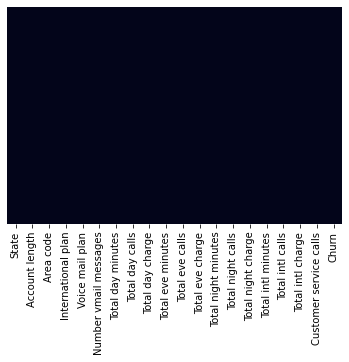

In [ ]:
##Checking for null values
sns.heatmap(Churn.isnull(),yticklabels=False,cbar=False)

In [ ]:
##For getting number of unique variables in the dataset
Churn.nunique(axis=0)


State                       51
Account length             212
Area code                    3
International plan           2
Voice mail plan              2
Number vmail messages       46
Total day minutes         1667
Total day calls            119
Total day charge          1667
Total eve minutes         1611
Total eve calls            123
Total eve charge          1440
Total night minutes       1591
Total night calls          120
Total night charge         933
Total intl minutes         162
Total intl calls            21
Total intl charge          162
Customer service calls      10
Churn                        2
dtype: int64

Absence of any heat content in the above heatmap indicates that no null values are present. 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


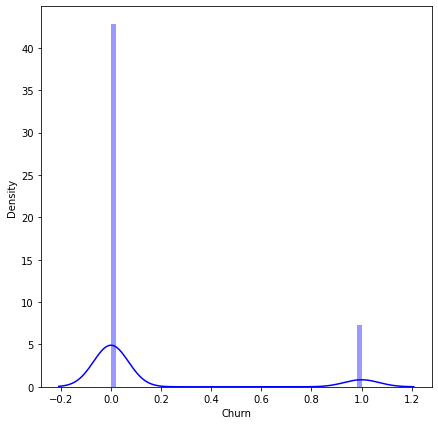

In [ ]:
# Output variable 'Churn'
plt.figure(figsize=(7,7))
sns.distplot(Churn['Churn'],color="blue")

Indicates that Churn variable which is our desired variable has output of 2 values only i.e 0(False) and 1(True).
  Also it mentiones that whether a customer is still availing(indicated as "False") the service of French SA or left the company(indicated as "True") .

In [ ]:
# finding the  total numerical columns
numeric_features=Churn.describe().columns
numeric_features

Index(['Account length', 'Area code', 'Number vmail messages',
       'Total day minutes', 'Total day calls', 'Total day charge',
       'Total eve minutes', 'Total eve calls', 'Total eve charge',
       'Total night minutes', 'Total night calls', 'Total night charge',
       'Total intl minutes', 'Total intl calls', 'Total intl charge',
       'Customer service calls'],
      dtype='object')

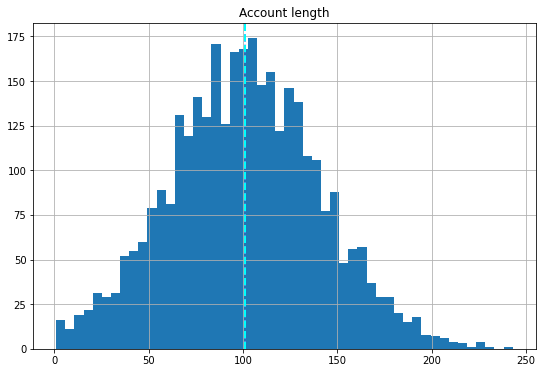

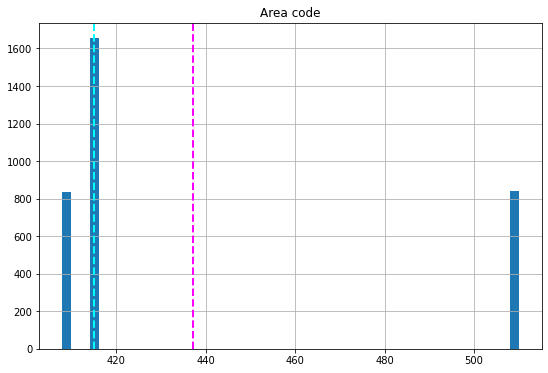

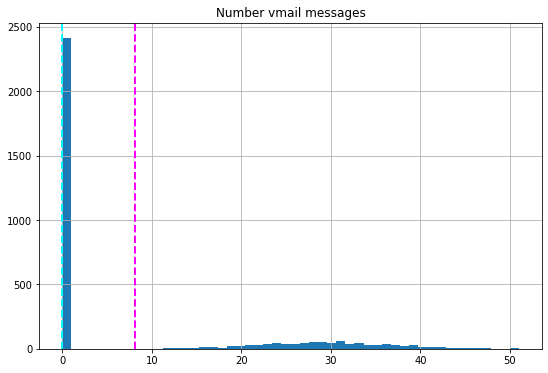

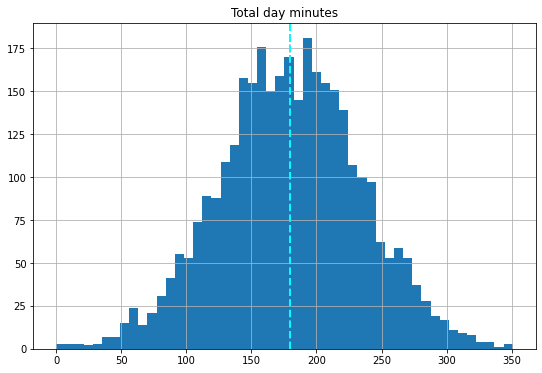

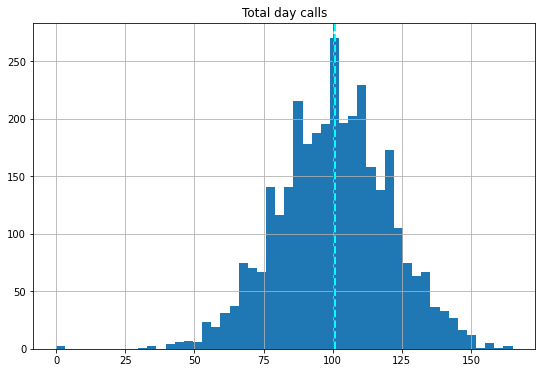

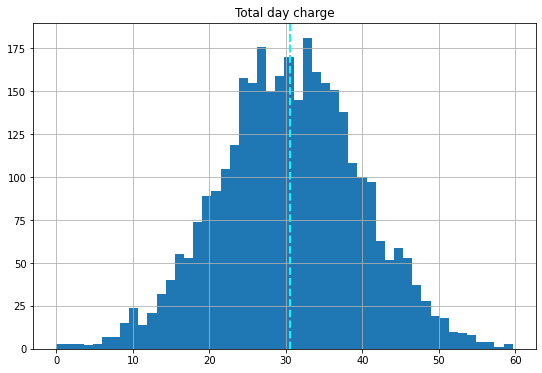

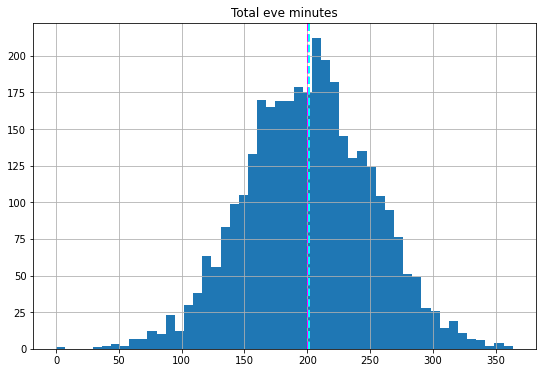

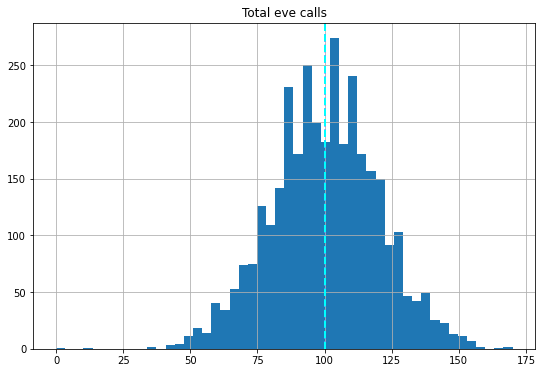

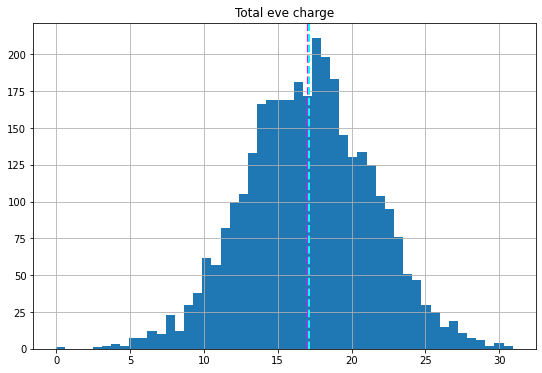

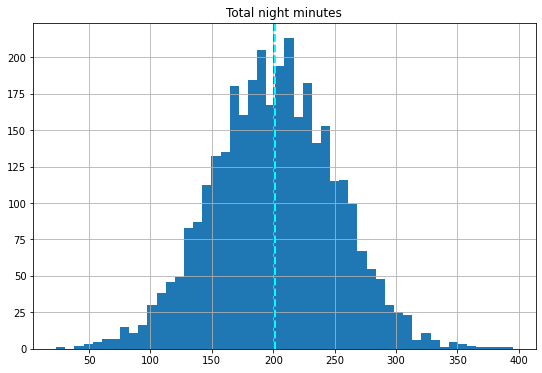

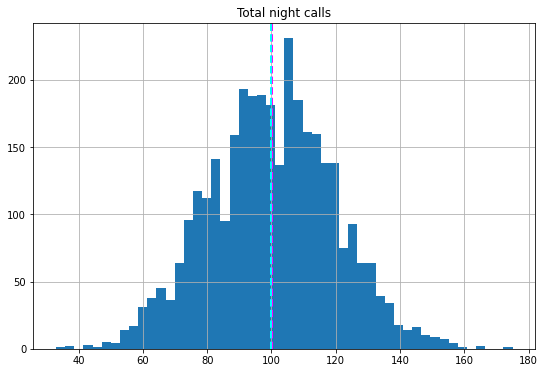

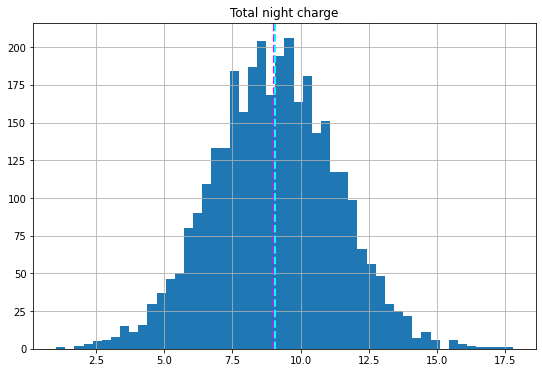

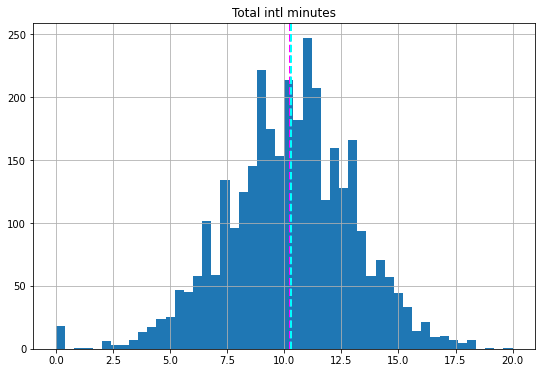

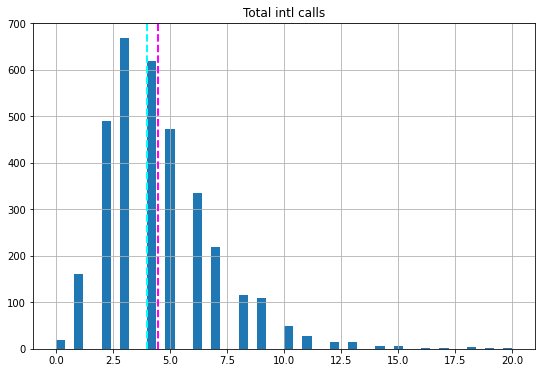

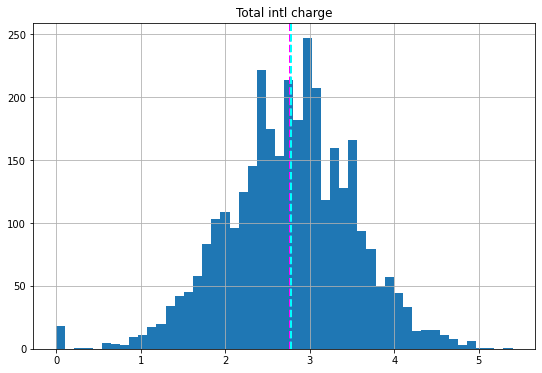

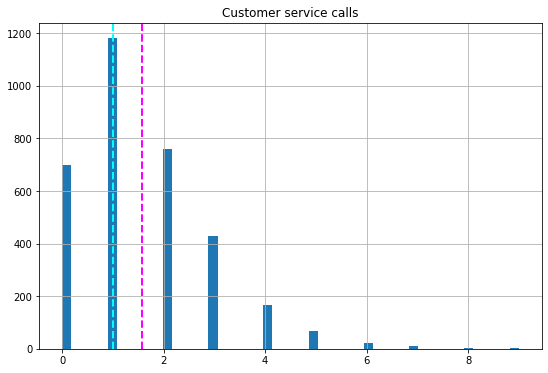

In [ ]:
#@ Analysing the numerical varibles
# ploting a bar plot for each numerical feature count (Except State,Churn,International Plan and Voice mail plan)

for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = Churn[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

Above Histogram plots show that most of the features are normally distributed 
except for Columns "Customer Service Call","International Calls","Area Code",Number of Vmail messages

From the above it can be seen that no null values are present in the in the entire dataset .  

In [ ]:
#Print Categorical features
categorical_features=[feature for feature in Churn.columns if Churn[feature].dtypes=='O']
categorical_features

['State', 'International plan', 'Voice mail plan']

In [ ]:
for feature in categorical_features:
   print('The feature is {} and number of categories are {}'.format(feature,len(Churn[feature].unique())))

The feature is State and number of categories are 51
The feature is International plan and number of categories are 2
The feature is Voice mail plan and number of categories are 2


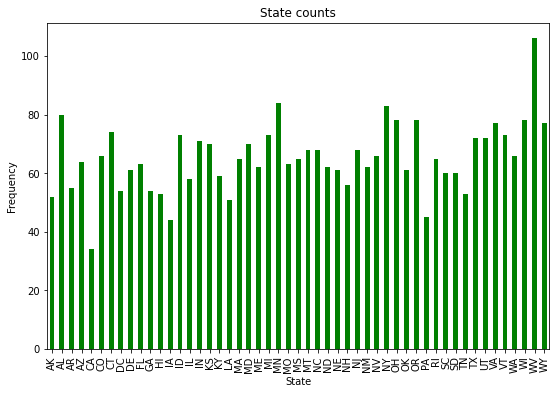

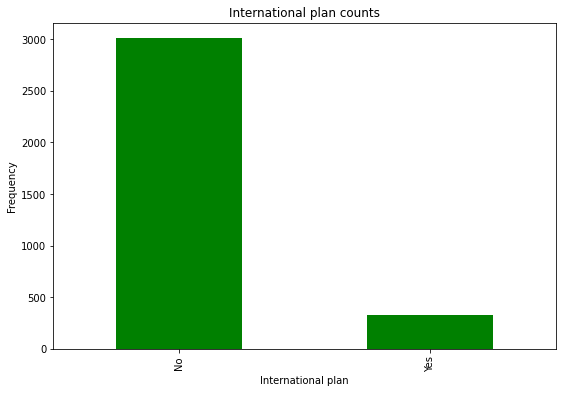

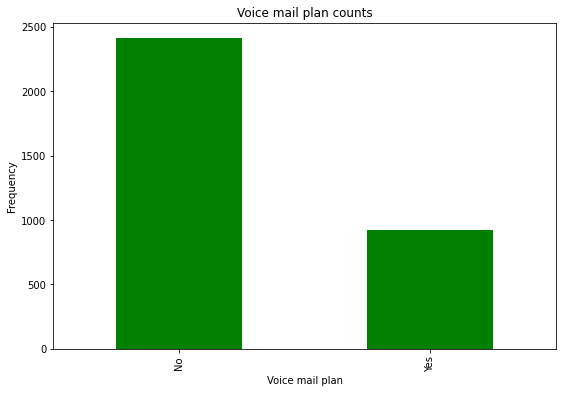

In [ ]:
for col in categorical_features:
    counts = Churn[col].value_counts().sort_index()
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='green')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")
plt.show()

In [ ]:
#Pairplot
sns.pairplot(Churn,hue="Churn",size=5)


Digging deeper above plots we can find some relation between "customer service calls and "Churn","total day Charge and Churn"

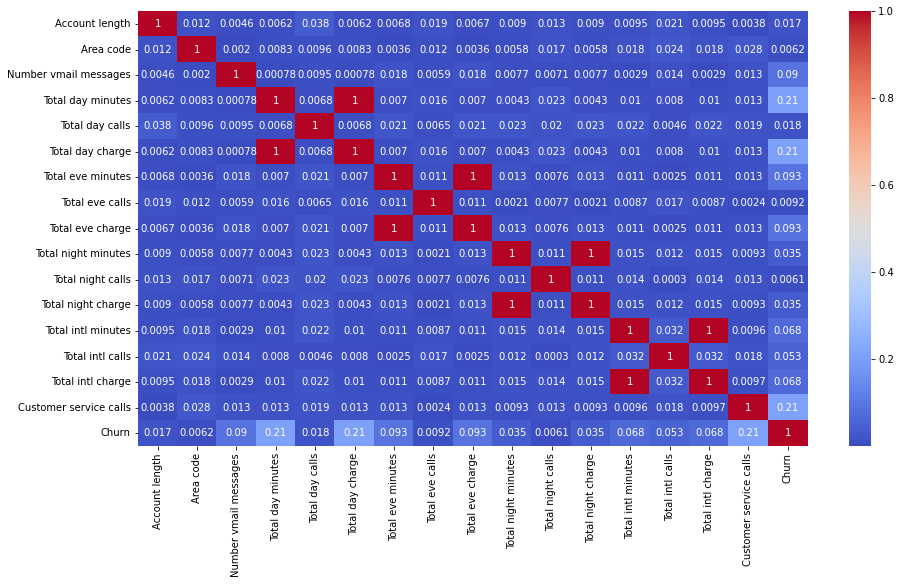

In [ ]:
## Correlation
plt.figure(figsize=(15,8))
correlation = Churn.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

As per the heat map the Churn show small correlation with Total minutes and Total Charges.





With the above heatmap the following varibles can be seen as highly corelated

1.   Total Day Charge and Day minutes
2.   Total Eve Charge and Eve Minutes
3.   Total Night Charge and Night Minutes
2.   Total Intl Charge and Intl Minutes




Text(0, 0.5, 'Churn')

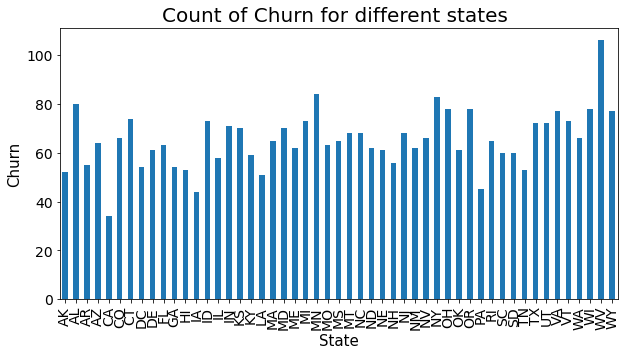

In [ ]:
# Create the figure object 
a = Churn.groupby(['State'])['Churn'].count().plot.bar(figsize = (10,5),fontsize = 14)

# Set the title
a.set_title("Count of Churn for different states ", fontsize = 20)

# Set x and y-labels
a.set_xlabel("State", fontsize = 15)
a.set_ylabel("Churn", fontsize = 15)

As per above graph top 3 states to get more Churns are WV,MN and NY

Text(0, 0.5, 'total service calls')

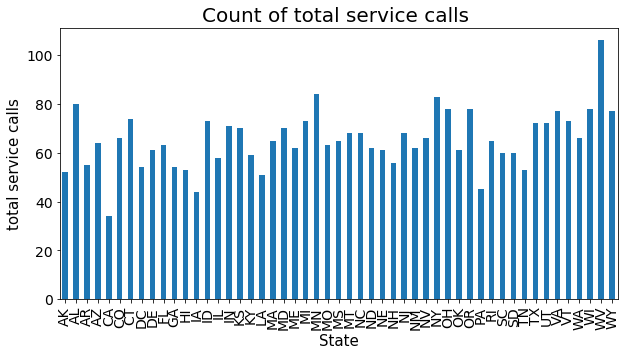

In [ ]:
# Create the figure object 
a = Churn.groupby(['State'])['Customer service calls'].count().plot.bar(figsize = (10,5),fontsize = 14)

# Set the title
a.set_title("Count of total service calls ", fontsize = 20)

# Set x and y-labels
a.set_xlabel("State", fontsize = 15)
a.set_ylabel("total service calls", fontsize = 15)

Text(0, 0.5, 'total day charge')

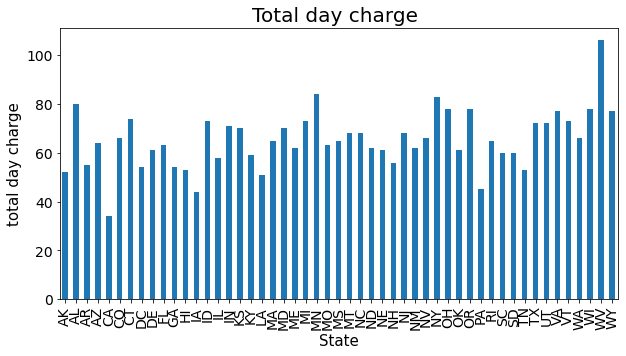

In [ ]:
#Create the figure object 
a = Churn.groupby(['State'])['Total day charge'].count().plot.bar(figsize = (10,5),fontsize = 14)

# Set the title
a.set_title("Total day charge ", fontsize = 20)

# Set x and y-labels
a.set_xlabel("State", fontsize = 15)
a.set_ylabel("total day charge", fontsize = 15)